# Multi-layer Perceptron

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])





Epoch 1/100


7/7 [==============================] - 2s 9ms/step - loss: 13.2672 - mae: 3.3400
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 10.9021 - mae: 2.9731
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 8.9971 - mae: 2.6306
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 7.2995 - mae: 2.2973
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 5.7634 - mae: 1.9613
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 4.4914 - mae: 1.6461
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 3.3736 - mae: 1.3679
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 2.5630 - mae: 1.1861
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 2.0475 - mae: 1.0832
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 1.7849 - mae: 1.0298
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 

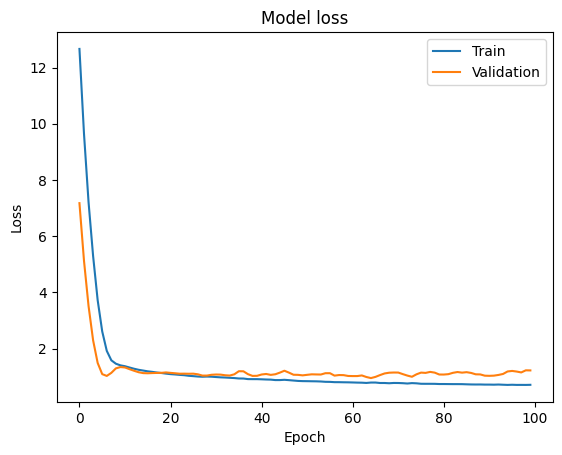

In [3]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---

# Check if GPU is available

In [4]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.19045-SP0
Tensor Flow Version: 2.15.0

Python 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas 2.1.4
Scikit-Learn 1.3.2
SciPy 1.11.4
GPU is NOT AVAILABLE


---

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 13.4404 - val_loss: 8.3870
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 10.9301 - val_loss: 6.5409
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 8.8263 - val_loss: 4.9684
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 6.9980 - val_loss: 3.6368
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 5.3673 - val_loss: 2.5921
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 4.0248 - val_loss: 1.8254
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 2.9025 - val_loss: 1.3742
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 2.2565 - val_loss: 1.1841
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 1.7810 - val_loss: 1.2068
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 1.5842 - val_loss: 1.2335
Epoch 11/100
7/7 

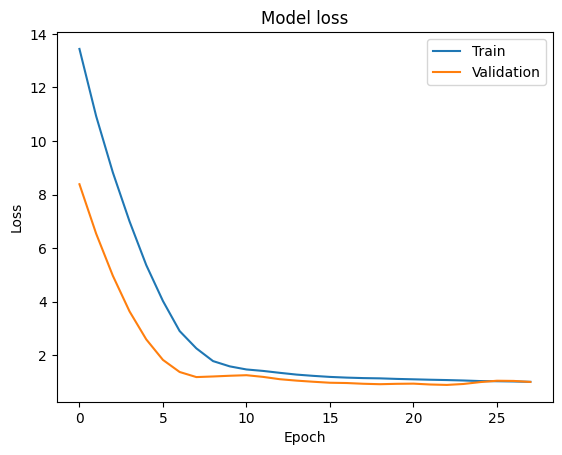

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()